In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(r"C:\Users\adila\OneDrive\Desktop\train.csv\train_lyst1720633807653 (1).csv")
data_train.head()
data_train.shape
# (14999, 9)


(14999, 9)

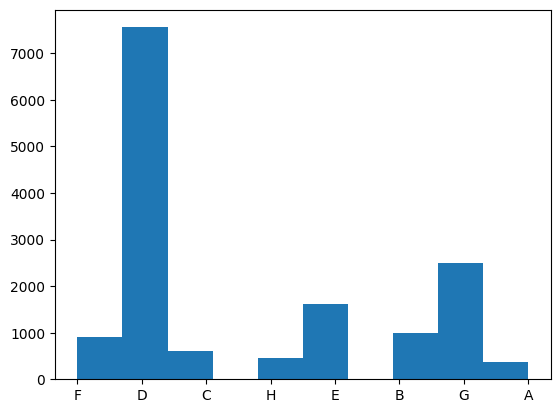

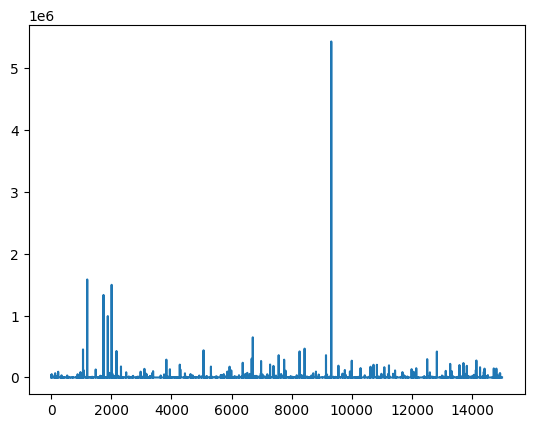

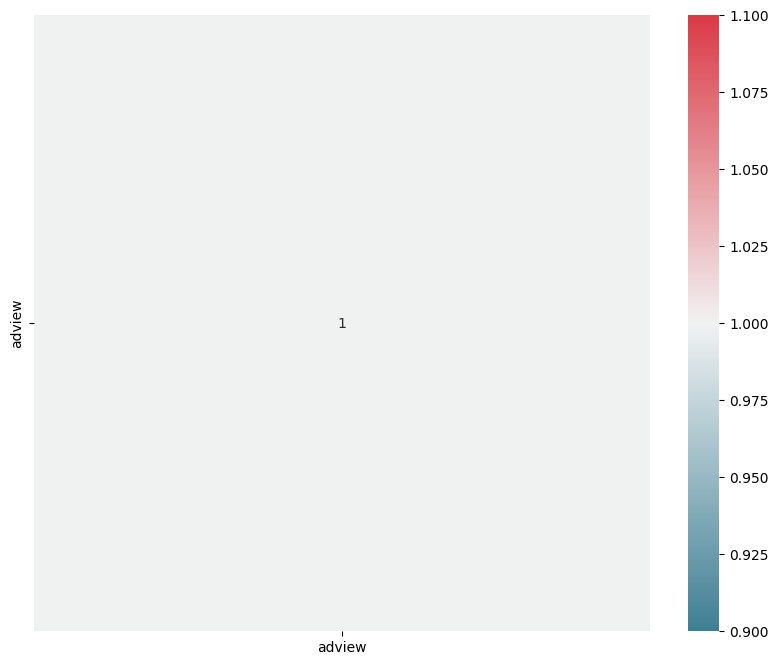

In [4]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
numeric_data_train = data_train.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_data_train.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()


In [6]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
output:

vidid	adview	views	likes	dislikes	comment	published	duration	category
0	     5912	40	   1031602	8523	      363	     1095	      1090	         457 6                	6
1	      2741	2	   1707	     56	           2	       6	      64	       570	4
2	    8138	1	   2023	     25	           0	       2	       122	     136	3
3	    9004	6	   620860	  777	       161	       153	      2088	      262	8
4	    122	1	666	1	0	     0	        2233	       31	      0            0     4

In [8]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
            
    if(h ==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s ='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv(r"C:\Users\adila\OneDrive\Desktop\train.csv\train_lyst1720633807653 (1).csv")
mp = pd.read_csv(r"C:\Users\adila\OneDrive\Desktop\train.csv\train_lyst1720633807653 (1).csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9004,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


In [ ]:
output:
vidid	adview	views	likes	dislikes	comment	published	duration	category
0	    5912	  40	1031602	   8523	      363	   1095	      1090	     457	6
1	    2741	   2	1707	    56	       2	     6	       64	      570	4
2	   8138	       1	2023	    25	       0	     2	       122	      136	3
3	   9004	       6	620860	    777	      161	     153	   2088	       262	8
4	    122	       1	666	         1	        0	      0	       2233	       31	4

In [10]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15357571865666558

In [38]:
import numpy as np
from sklearn import metrics

# Ensure y_train and y_test are 1D arrays
y_train = np.array(y_train).ravel()  # or y_train = np.array(y_train).reshape(-1,)
y_test = np.array(y_test).ravel()    # or y_test = np.array(y_test).reshape(-1,)

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, supportvector_regressor)


Mean Absolute Error: 3493.3179717888042
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117
Mean Absolute Error: 1696.9815596832475
Mean Squared Error: 833685850.6202459
Root Mean Squared Error: 28873.618592414874


In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Ensure y_train is a numpy array and then reshape it to be a 1D array
y_train = np.array(y_train).ravel()  # or y_train = np.array(y_train).reshape(-1,)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

# Random Forest Regressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)


Mean Absolute Error: 4508.151639344263
Mean Squared Error: 2893764460.673497
Root Mean Squared Error: 53793.72138710518
Mean Absolute Error: 3451.1779304374754
Mean Squared Error: 873568488.8049892
Root Mean Squared Error: 29556.192055218973


In [22]:
import keras
from keras.layers import Input, Dense

# Define the ANN model
ann = keras.models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer to specify the shape
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1)
])

# Define optimizer and loss
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error

# Compile the model
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

# Fit the model
ann.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Evaluate the model
results = ann.evaluate(X_test, y_test)
print("Test Loss, Test MSE:", results)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 600639552.0000 - mean_squared_error: 600639552.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 363420480.0000 - mean_squared_error: 363420480.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 362949184.0000 - mean_squared_error: 362949184.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 346170592.0000 - mean_squared_error: 346170592.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 570475456.0000 - mean_squared_error: 570475456.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1580069888.0000 - mean_squared_error: 1580069888.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 909174336.0000 - mean_squared_error: 909174336.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 936996224.0000 - mean_squared_error: 936996224.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 837275392.0000 - mean_squared_err

In [42]:
import joblib

# Saving Scikit-learn models
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.keras")  # Using the recommended Keras format
